## IRIS Classifier - Hello World of ML!

## Introduction

__The Iris Flowers__

Iris flowers are classified into three species: setosa, versicolor, and virginica, each of which exhibits distinct characteristics in terms of measurements.

__Objective__

The primary goal is to leverage ML techniques to build a classification model that can accurately identify the species of iris flowers based on their measurements. 

## Imports

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Notebook parameters

In [15]:
# NumPy

np.set_printoptions(linewidth=200) # to enlarge the print() line
np.random.seed(42) # the random seed init
np.set_printoptions(precision=3) # for numpy floats: number of decimals

## Globals & hyperparameters

In [16]:
# =============
# IRIS Data
# =============

# on assieoussou (Laptop)
# DATA_TOPDIR = "/home/ml/datasets/iris"

# on cocoti (Tour)
DATA_TOPDIR = "/data/ml/datasets/iris"

IRIS_FILENAME = "Iris.csv"

# the total number of digits
num_classes = 3

# ==========================
# Training hyperparameters
# ==========================

batch_size = 64


## Data Preparation and visualization

>__Note:__ In this notebook, all the steps regarding the understanding of the data are reduced. Indeed, in practice Data Scientist spend __80%__ of their time here!

Visualization is restricted to: 
- __univariate plots__ for understanding each attribute or feature, and
- __multivariate plots__ for understanding the relationships among attributes 


In [17]:
# load the data
dataset = pd.read_csv(os.path.join(DATA_TOPDIR, IRIS_FILENAME))
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
# remove Id
dataset = dataset.drop("Id", axis="columns")

# statistical summary
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
# class distribution => perfectly balanced (e.g. 33% per class)!
dataset.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

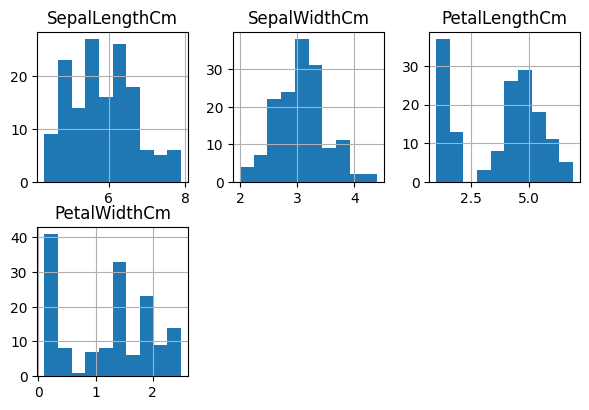

In [20]:
# viz: univariate plots & histograms
dataset.hist(layout=(3,3), figsize=(7, 7))
#plt.tight_layout()
plt.show()

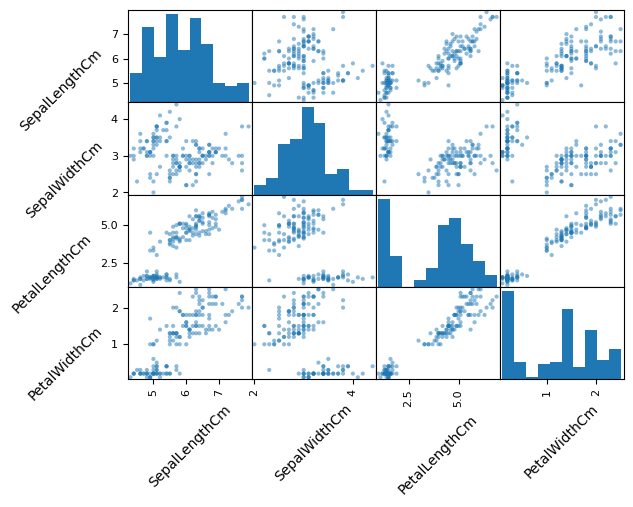

In [31]:
# Viz: multivariate plots 

# scatter plot matrix
axes = pd.plotting.scatter_matrix(dataset)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(45)
    ax.yaxis.label.set_ha('right')
plt.show()

__Interpretation__

The previous plots show that many features are __linearly separables__; thus, the classification problem will be easy to solve. It means that simple models and few data will suffice to do the job! 

## Train and evaluate some classification algorithms

__Performed steps__ 

1. train-test split
2. training and evaluate 5 models
3. select the best model

__Test harness__

- Evaluation metric: __accuracy__
- We will use 10-fold cross-validation to estimate __accuracy__


__train-test splitting__

In [22]:
# features vs labels separation 
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
print("[INFO] whole dataset => ", X.shape, Y.shape)

test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print("[INFO] training dataset => ",X_train.shape, Y_train.shape)
print("[INFO] testing dataset => ",X_test.shape, Y_test.shape)

[INFO] whole dataset =>  (150, 4) (150,)
[INFO] training dataset =>  (120, 4) (120,)
[INFO] testing dataset =>  (30, 4) (30,)


__Models__

In [23]:
# the models
models = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()), 
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

# evaluate each model in turn
results = []
names = []
for name, model in models:
    t1 = time.time()
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    t2 = time.time()
    print("[INFO] {}: mean acc. = {:.2f}%, std = (+/- {:.2f}), duration = {:.2f} seconds".format(name, cv_results.mean()*100, cv_results.std(), (t2-t1)))

[INFO] LR: mean acc. = 98.33%, std = (+/- 0.03), duration = 0.13 seconds
[INFO] LDA: mean acc. = 97.50%, std = (+/- 0.04), duration = 0.02 seconds
[INFO] KNN: mean acc. = 98.33%, std = (+/- 0.03), duration = 0.03 seconds
[INFO] CART: mean acc. = 95.00%, std = (+/- 0.08), duration = 0.02 seconds
[INFO] NB: mean acc. = 96.67%, std = (+/- 0.04), duration = 0.02 seconds
[INFO] SVM: mean acc. = 98.33%, std = (+/- 0.03), duration = 0.02 seconds


__Select the best model__ 

Since we have a a population of accuracy measures for each algorithm, we could create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. However, we don't do this here. 

We simply display the results and manually pick the "best" model: 

In [24]:
names, results

(['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM'],
 [array([1.   , 1.   , 1.   , 1.   , 1.   , 0.917, 0.917, 1.   , 1.   , 1.   ]),
  array([1.   , 1.   , 1.   , 1.   , 1.   , 0.917, 0.917, 1.   , 0.917, 1.   ]),
  array([0.917, 1.   , 1.   , 1.   , 1.   , 1.   , 0.917, 1.   , 1.   , 1.   ]),
  array([1.   , 1.   , 0.75 , 1.   , 1.   , 0.917, 0.917, 1.   , 0.917, 1.   ]),
  array([1.   , 1.   , 1.   , 1.   , 1.   , 0.917, 0.917, 0.917, 0.917, 1.   ]),
  array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.917, 1.   , 0.917, 1.   ])])

__Interpretation__
Let us select __KNN__ as our bets model - even if wa could have chosen __LR__ or __SVM__. 

## Evaluate the best model on the testing data

In [25]:
# (re)fit from scratch on full training dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

# evaluate on testing
predictions = knn.predict(X_test)
print("[INFO] accuracy_score = %0.2f%%" % (accuracy_score(Y_test, predictions) * 100))
print("[INFO] confusion_matrix = \n", confusion_matrix(Y_test, predictions))
print("[INFO] classification_report = \n", classification_report(Y_test, predictions))

[INFO] accuracy_score = 90.00%
[INFO] confusion_matrix = 
 [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
[INFO] classification_report = 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



__END OF NOTEBOOK.__